In [1]:
import pandas as pd
import numpy as np

from src.LatentSpace import LatentSpace
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

import umap

In [26]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_256dim_time_freq_128k_simplified_25e/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        latent_dims=256,
                        num_tiles=64,
                        threshold_level=0.5
                        )

Found 278581 files for Generator set


In [ ]:
latent_space.build()

Getting predictions from autoencoder...


In [27]:
latent_space.load('data/autoencoder_256dim_time_freq_128k_simplified_25e/')

Loaded tracks.
Loaded artists.
Loaded genres.


In [103]:
latent_space.get_index_by_artist_name('Thompson Twins')

,track_id,track_name,artist_name
113145,4HUUznT2TRY6FDmxt85N2g,Lay Your Hands On Me,Thompson Twins
173643,7r17jMIduL3BTaxdsUIwj6,Hold Me Now (Extended Short),Thompson Twins
223548,7q4woYj5egnMVWOJWUDHPs,If You Were Here,Thompson Twins
255664,0ZKtHVg8mu6GIngKP9vbhN,Love on Your Side,Thompson Twins
260039,15PC4RTMeQa2Gv4nnwSrwc,Doctor! Doctor!,Thompson Twins
266872,7ihhy2Y8wzP6MUmbx8LYh1,Doctor! Doctor! (Original Mix),Thompson Twins


In [105]:
seed =  

display(latent_space.get_similar_tracks_by_index(seed))
display(latent_space.get_similar_artists_by_index(seed))
display(latent_space.get_similar_genres_by_index(seed))

,index,track_name,artist_name,track_uri,similarity
0,223548,If You Were Here,Thompson Twins,spotify:track:7q4woYj5egnMVWOJWUDHPs,1.000000
1,219276,Bird and Flag,The Sea and Cake,spotify:track:7K3COuOqXfynIKJifj04Ft,0.670018
2,173774,Wave Gods,Nas,spotify:track:14246VCxRDGZHqlMlqWSz4,0.640302
3,53644,Fadaye Too Chesham,Amin Habibi,spotify:track:1bepcGNF1WZQUq02B36xfk,0.633044
4,33205,Cocoa Butter,Statik Selektah,spotify:track:3Ewv4TxbUW3Wbpn5aNrPJR,0.628058
5,104654,Reflections,Mat Zo,spotify:track:7si4ZB2cShPmL7Du5qhGsQ,0.623639
6,107927,Har jag fel,Rolandz,spotify:track:30To3Bqn9trT59n2wZ0InR,0.614314
7,152611,Rabra Bina,Sawt El Atlas,spotify:track:1blji3C1RPxthoEnr53KWC,0.610885
8,95325,Fatty and Specky,Stig Of The Dump,spotify:track:3z5LozepCDVS2CB6u5hUqO,0.610546
9,31242,Into Pieces (feat. Grabbitz),Grabbitz,spotify:track:1gTa0kM9Xlfb2HS1KOzz4V,0.610056


,artist_id,artist_name,similarity
0,5jVeqi3PNaTOajfvBa4uFn,Thompson Twins,0.604946
1,5ixQ5hSywFLUaxoaA0uVaH,Anand Raj Anand,0.585722
2,7fvEDuYk5vkKKZGpv6Knus,Johnny Ventura,0.578675
3,2n7USVO8fO8FF8zq4kG2N1,Mat Zo,0.567603
4,3iQM78Xg0wJnGZhgVNLPmY,McFadden & Whitehead,0.559975
5,4sWZeqtvvnDbfIvKf1XE7M,The Burbs,0.559746
6,0kVsb7UUtXZuC6eZqs9Hiu,24 Bit,0.549490
7,5sUo05Bqem5IgTa9Z1G0fl,Sleep Of Oldominion,0.538584
8,68qdTzh1ytZmNa0FlRLEAg,Heavy1,0.530061
9,65kizxg0ldv6bDBKxbm0p9,El Coco,0.520434


,genre,similarity
0,nordnorsk musikk,0.485797
1,classic belgian pop,0.448934
2,rock piauiense,0.431934
3,taiwan metal,0.399062
4,rap conciencia,0.398194
5,musique alsacienne,0.397858
6,moldovan pop,0.392865
7,mexican son,0.379622
8,dutch cabaret,0.379468
9,limerick indie,0.375070


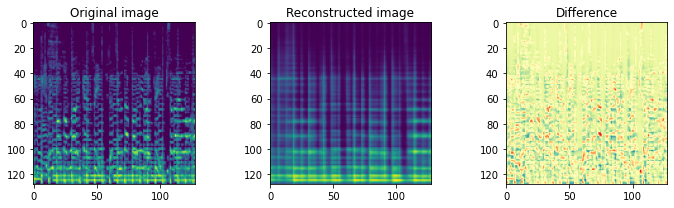

In [137]:
latent_space.plot_reconstruction(233589)

In [138]:
seed = 233589

similar_artist_tracks = pd.DataFrame()
for artist_id in latent_space.get_similar_artists_by_index(seed, num=100).artist_id:
    similar_artist_tracks = pd.concat([similar_artist_tracks, latent_space.get_index_by_artist_id(artist_id)])
    
similar_artist_tracks = latent_space.tracks[latent_space.tracks.track_id.isin(similar_artist_tracks.track_id)]

similarity = manhattan_distances(np.array([latent_space.tracks.iloc[seed][latent_space.latent_cols]]), np.array(similar_artist_tracks[latent_space.latent_cols]))

similar_artist_tracks['similarity'] = similarity.T

most_similar = similar_artist_tracks.sort_values(by='similarity', ascending=True).reset_index()[:10]
most_similar[['track_uri','track_name','artist_name','artist_genres','similarity']]

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_8274/2981580851.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_artist_tracks['similarity'] = similarity.T


,track_uri,track_name,artist_name,artist_genres,similarity
0,spotify:track:0rNXiNb8IN78GL6cx9VsP7,Girl U Want - 2009 Remaster,DEVO,"[alternative rock, art punk, art rock, dance r...",0.000000
1,spotify:track:1MZkHfDZHMR5bPnXE1FhIN,The Moment,Ryohu,[j-rap],222.209865
2,spotify:track:493rr2wuuck74wNqh4ZiBq,Baptise Bless & Bleed,PIG,"[british industrial, ebm, electro-industrial, ...",234.115237
3,spotify:track:02M2OoPaKPmkCl7kidq6nK,Theme for Maxine,Woody Shaw,"[avant-garde jazz, bebop, contemporary post-bo...",245.295632
4,spotify:track:7egfNnjgY1ytJGVlOhThWZ,Hela Helgen,Näääk,"[swedish hip hop, swedish trap pop]",255.052578
5,spotify:track:7LQqw8VdC1i84TKf1tQSDV,What Is Love,Megan Joy,[idol],256.256322
6,spotify:track:2PNm88ykIHBlR7ms1y89dU,Guestlist,Dutta,"[bass house, jump up, uk dnb]",257.919053
7,spotify:track:2PhHi9LIDkVGYS5nNaSyoP,Submersible,Passafire,"[east coast reggae, reggae rock]",258.720654
8,spotify:track:0BuTVSIbiQGdxW7njjKng7,讓我為你唱情歌,Jam Hsiao,"[mandopop, taiwan pop]",258.920276
9,spotify:track:127BZ9PnP40CaAJM8nnQC3,Roll With Me,Deborah Coleman,"[acoustic blues, blues, electric blues, modern...",259.108112


In [48]:
latent_space.get_index_by_artist_name('Onyeabor')

,track_id,track_name,artist_name
6152,1ETZhP9orTkDclKEyt0xqm,Fantastic Man,William Onyeabor
70313,3QPbXJa0qz3hxAFCQO2hU0,Better Change Your Mind,William Onyeabor
88817,1dSFUmePLinKKFOmXaHDQu,Ride on Baby,William Onyeabor
233003,13oiVcrRczGhGVbWr38qdq,When the Going is Smooth & Good,William Onyeabor
256120,43q9SYFiYHMNgUDNzxm3WI,Body and Soul,William Onyeabor


In [49]:
latent_space.get_similar_tracks_by_index(256120, similarity_measure='cosine')

,index,track_name,artist_name,track_uri,similarity
0,256120,Body and Soul,William Onyeabor,spotify:track:43q9SYFiYHMNgUDNzxm3WI,1.000000
1,41116,Motorboat,Father Funk,spotify:track:2IMozJJtL559bhv5j76mk5,0.713671
2,134331,Savour - Soundbalance Remix,Tom Noah,spotify:track:2AUTnVeoZHxApItI3WYaVT,0.713510
3,33226,Nhemamusasa: Instrumental Excerpt I,Nonesuch Explorer Series,spotify:track:6LwivZn6nvnPv6SMR5nmf7,0.711173
4,112508,La Playa,Bastien Groove,spotify:track:60rl7WQclfmV7mNVBPKR4j,0.705255
5,128193,Space,Lazy Guy,spotify:track:0wtBOdqXwkW9yAKEr0xblB,0.694111
6,245409,Renegate Masta,Wasabi,spotify:track:4jDTB3T4AyPoRFGi3bNJWm,0.692229
7,174675,Saturn Storm - Alberto Ruiz Remix,Alberto Ruiz,spotify:track:78CYhVunRrzBlbPAtgi5mQ,0.691268
8,29252,Of Historical - Original Mix,Lauhaus,spotify:track:36lcVBAvV2L7YqJKqgSPSR,0.682898
9,72181,Electricity,Midnight Star,spotify:track:1F8n34qAZhAG3aSks1jVxN,0.677917


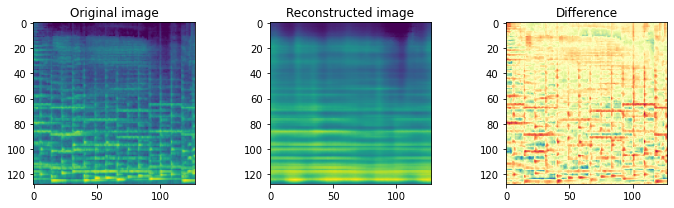

In [29]:
latent_space.plot_reconstruction(145048)

In [31]:
latent_space.get_similar_genres_by_index(145048)

,genre,similarity
0,old school hip hop,0.336843
1,rap,0.332772
2,funky breaks,0.321580
3,popping,0.304055
4,ukg revival,0.301877
5,freestyle,0.295861
6,tribal house,0.295148
7,samba de roda,0.292001
8,brazilian tech house,0.291730
9,pop r&b,0.291604


In [10]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

f = open('data/apikeys/.apikeys.json')
apikeys = json.load(f)
SPOTIPY_CLIENT_ID = apikeys['clientId']
SPOTIPY_CLIENT_SECRET = apikeys['clientSecret']

credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)

spotify = spotipy.Spotify(client_credentials_manager=credentials_manager)

In [23]:
spotify.search('Miranda and the Beat', type='track')['tracks']['items'][0]['id']

'5ClsyJSw4gT3yyWk9FVC0W'

In [25]:
spotify.track('5ClsyJSw4gT3yyWk9FVC0W')['preview_url']

'https://p.scdn.co/mp3-preview/c08818ad7d2515803e5f2eea922737e26347149f?cid=5f818fbc1c374e239ee0139163734165'

In [39]:
credentials_manager.get_access_token()

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_10776/2366778036.py:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  credentials_manager.get_access_token()


{'access_token': 'BQAlXANGQzMM_lzbBNxVz7buDM3UCtt9v7HFHCLlk38pim1jqlOliut3MLhgDgfejt7xILoxTrg3NZtPRed--9cUVa6kPlpBKklGV4B6iGH6zs2XzHY',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'expires_at': 1660951093}

In [ ]:
user_id = credentials_manager.client_id

endpoint_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

#need to understand how to get token

In [86]:
latent_space.get_index_by_artist_name('Slickers')

,track_id,track_name,artist_name
26925,5fdM4XVQzHBDhv3kx0vIJO,Johnny Too Bad,The Slickers
238672,29pNI1tirJpHDNqUsWqpMW,Hawaiian War Chant,Spike Jones & His City Slickers
243597,2LDNj23JFTtOMaUEgzPOhH,Hawaiian War Chant,Spike Jones & His City Slickers
266531,3JmwSgu1vxYXdblOJMXUQz,Cocktails For Two,Spike Jones & His City Slickers
270699,3JWXC1KC0srPGPj4gs8tLA,Johnny Too Bad,The Slickers
273814,3GeJcSxK4wC1a8CW3IpA12,You Always Hurt The One You Love,Spike Jones & His City Slickers


In [5]:
from sklearn.metrics import mean_squared_error

In [78]:
img = latent_space.get_image_data_by_index(246197, get_all_tiles=False)
prediction = np.array(latent_space.autoencoder(img))

print(mean_squared_error(img.reshape(-1), prediction.reshape(-1)))

0.006029537761133943


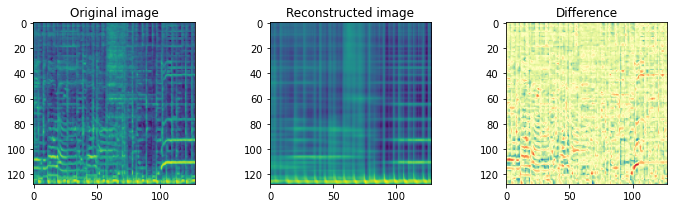

In [91]:
latent_space.plot_reconstruction(26925)


In [93]:
latent_space.get_similar_tracks_by_index(270699)

,index,track_name,artist_name,track_uri,similarity
0,270699,Johnny Too Bad,The Slickers,spotify:track:3JWXC1KC0srPGPj4gs8tLA,1.000000
1,59413,Time,Nonn,spotify:track:5nlVKMzn9yq3VBX1MxozRg,0.692396
2,58745,Superstar Sh*t,Dominic Fike,spotify:track:20j7l6tFtc5lynXpbOQg1O,0.689401
3,1643,Shadow King,ECHOREV,spotify:track:0ZJfCTGCkQe6UfDN3Kf19g,0.683859
4,205389,Bamba,Big Pin,spotify:track:4U2hGoqXbSOgysfP30JYSp,0.683057
5,260610,Where Did You Sleep Last Night,Lead Belly,spotify:track:0p5zJBYoJOzVLBiDeA0PvS,0.682522
6,76375,The Most of It,Robert Frost,spotify:track:3lKlTc2aRwGXRN3yvs52Ro,0.676048
7,209108,River - Anna Phoebe Rework,Anna Phoebe,spotify:track:29camxr0XTklgiRR5MAetS,0.672630
8,23771,Alltid dig nära,Sofia Karlsson,spotify:track:0Q5gcOe8apc0m2T64n3BDG,0.670839
9,245134,None Shall Sleep Tonight (Nessun Dorma),Deanna Durbin,spotify:track:1dy7pcSj9RIcrZCIHc09hL,0.668320


In [94]:
latent_space.get_similar_genres_by_index(270699)

,genre,similarity
0,beat poetry,0.660460
1,xenharmonic,0.651604
2,experimental percussion,0.635947
3,british soundtrack,0.630592
4,polish modern jazz,0.626896
5,chamber orchestra,0.618988
6,classical organ,0.617916
7,british dance band,0.609536
8,prank,0.606225
9,spanish classical,0.596271


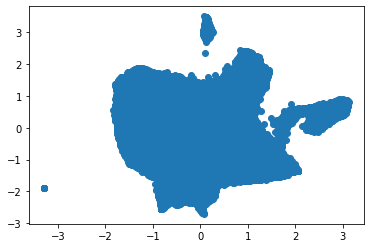

In [12]:
import matplotlib.pyplot as plt

plt.scatter(embedding_space['umap_0'], embedding_space['umap_1'])

In [4]:

latent_space.genres = latent_space.genres.reset_index()

In [8]:
vector = latent_space.get_vector_by_name('The Mystery Lights', scope='artist')

In [9]:
latent_space.get_similarity(vector, latent_space.tracks, subset=latent_space.latent_cols, num=10, similarity_measure='cosine')[['track_name', 'track_uri', 'artist_name']]

,track_name,track_uri,artist_name
0,Do the 45,spotify:track:2i73nMgIoA3pgitg1Cd4E9,Thomas East & The Fabulous Playboys
1,Someone Else Is in Control,spotify:track:1PdiiDXRuq65bQqyBd4XES,The Mystery Lights
2,DREAM IN MY MIND,spotify:track:4RJ8vJyadKZOMTUHbeYDBw,Ruperts People
3,Venas de Aire,spotify:track:2WACZ37yJl8vLbWSqMG2Yu,Staya Staya
4,Head Full of Steam - Remastered,spotify:track:4BufvZQySeclqSXz06xO3n,The Go-Betweens
5,Too Many Girls,spotify:track:0aQIO7AX9zLi9FFxON5DjJ,The Mystery Lights
6,What Happens When You Turn the Devil Down,spotify:track:1H1KT4VlIrsLh5h2rRHvD7,The Mystery Lights
7,Don't Let's Start,spotify:track:2kGwIRvtl5Axrb8hzIruFb,They Might Be Giants
8,Why Be Something That You're Not - From 10 Son...,spotify:track:6vLgiV0vDVAVP6dT6KEypJ,Negative Approach
9,Skayejero,spotify:track:4an0GCjgdzZWB6PwVsKsIz,Staya Staya
